<a href="https://colab.research.google.com/github/konstihengge/Tensorflow_tutorial/blob/main/Number_Detection_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [27]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
print("Shape Trainingsdaten: {}".format(train_images.shape))
print("Dimension Bild Nr. 5: {}".format(train_images[5].shape))

train_images = train_images.reshape((60000, 28, 28, 1))
train_images = train_images.astype('float32')
train_images /= 255

test_images = test_images.reshape((10000, 28, 28, 1))
test_images = test_images.astype('float32')
test_images /= 255

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

NrTrainimages = train_images.shape[0]
NrTestimages = test_images.shape[0]

print("Trainingsdatensatz:{}".format(train_images.shape))
print("Testdatensatz:{}".format(test_images.shape))
print("Wir haben {} Trainingsbilder und {} Testbilder.".format(NrTrainimages,NrTestimages))

Shape Trainingsdaten: (60000, 28, 28)
Dimension Bild Nr. 5: (28, 28)
Trainingsdatensatz:(60000, 28, 28, 1)
Testdatensatz:(10000, 28, 28, 1)
Wir haben 60000 Trainingsbilder und 10000 Testbilder.


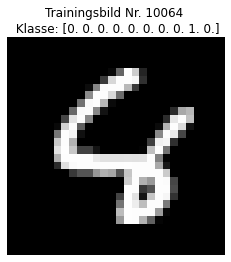

In [45]:
%matplotlib inline
import matplotlib.pyplot as plt
import random

randindex = random.randint(0, 60000)
plttitle = "Trainingsbild Nr. {} \n Klasse: {}".format(randindex, train_labels[randindex])

plt.imshow(train_images[randindex].reshape(28,28), cmap='gray')
plt.title(plttitle)
plt.axis('off')
plt.show()

In [20]:
import os
import numpy as np
from tensorflow.keras.callbacks import TensorBoard
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras import backend as K


#Bestimmung des Formats der Eingabedaten
mnist_inputshape = train_images.shape[1:4]
# Die Netzwerkarchitektur
model = Sequential()
# Kodierungsblock
model.add(Conv2D(32, kernel_size=(5,5),
activation = 'relu',
input_shape=mnist_inputshape))
model.add(MaxPooling2D(pool_size=(2,2)))
# Conv_Block 2
model.add(Conv2D(64, kernel_size=(5,5),activation= 'relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.5))
# Prädiktionsblock
model.add(Flatten())
model.add(Dense(128, activation='relu', name='features'))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dense(10,activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 24, 24, 32)        832       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 8, 8, 64)          51264     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 4, 4, 64)          0         
_________________________________________________________________
dropout (Dropout)            (None, 4, 4, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1024)              0         
_________________________________________________________________
features (Dense)             (None, 128)               1

In [21]:
# Verlsutfunktion und Optimierung
# Verlustunktion ist die Categorical Cross-Entropy
# Als Optimierungsverfahen wird der Adam-Optimierer verwendet
model.compile(loss='categorical_crossentropy',
optimizer='Adam',
metrics=['accuracy'])

In [29]:
#Training
#Trainigsepoche besteht aus der Präsentation eines Trainingsdatensatzes und Anpasssung des Modells
#Anzahl an Trainingsepochen gibt an, wie oft wir dem Netz die Trainingsdaten präsentieren
#Batch Gradient descent: für eine Trainingsepoche den gesamten Datensatz präsentieren und das Modell erst danach aktualisieren
#Mini-Batch Gradient Descent: präsentieren Netz nur gewisse Anzahl an Trainigsdaten und modifizieren erst dannn das Netzmodell (verändern die Gewichte)

# TensorBoard - Vorbereitung
LOGDIR = "logs"
my_tensorboard = TensorBoard(log_dir = LOGDIR,
histogram_freq=0,
write_graph=True,
write_images=True)
# Hyperparameter
my_batch_size = 128
my_num_classes = 10
my_epochs = 12
history = model.fit(train_images, train_labels,
batch_size=my_batch_size,
callbacks=[my_tensorboard],
epochs=my_epochs,
verbose=1,
validation_data=(test_images, test_labels))

Epoch 1/12
469/469 [==============================] - 62s 130ms/step - loss: 0.3823 - accuracy: 0.8769 - val_loss: 0.0628 - val_accuracy: 0.9792
Epoch 2/12
469/469 [==============================] - 60s 128ms/step - loss: 0.1169 - accuracy: 0.9654 - val_loss: 0.0394 - val_accuracy: 0.9862
Epoch 3/12
469/469 [==============================] - 60s 128ms/step - loss: 0.0888 - accuracy: 0.9731 - val_loss: 0.0307 - val_accuracy: 0.9897
Epoch 4/12
469/469 [==============================] - 60s 127ms/step - loss: 0.0712 - accuracy: 0.9794 - val_loss: 0.0336 - val_accuracy: 0.9890
Epoch 5/12
469/469 [==============================] - 60s 128ms/step - loss: 0.0643 - accuracy: 0.9812 - val_loss: 0.0239 - val_accuracy: 0.9918
Epoch 6/12
469/469 [==============================] - 59s 127ms/step - loss: 0.0579 - accuracy: 0.9824 - val_loss: 0.0202 - val_accuracy: 0.9932
Epoch 7/12
469/469 [==============================] - 61s 130ms/step - loss: 0.0525 - accuracy: 0.9837 - val_loss: 0.0246 - val_ac

In [30]:
# GEnauigkeit und die Verlustfunktion 

score = model.evaluate(test_images, test_labels)
print('Test Verlust:', score[0])
print('Test Genauigkeit:', score[1])

313/313 [==============================] - 3s 10ms/step - loss: 0.0191 - accuracy: 0.9933
Test Verlust: 0.019121862947940826
Test Genauigkeit: 0.9933000206947327


In [34]:
#Abspeichern der Netzwerkarchitektur mit den trainierten Gewichtungen
from tensorflow.keras import models

model.save('SimpleCNN_MNIST.h5')

In [37]:
from tensorflow.keras import models
modellverzeichnis = 'models'
# Speichern des Modells im TensorFlow-SavedModel Format
model.save(modellverzeichnis, save_format = 'tf')

INFO:tensorflow:Assets written to: models/assets


In [39]:
from tensorflow.keras.models import load_model
modellverzeichnis = 'models'
# Laden des HDF5-Modells (h5)
# h5 ist die typische Dateierweiterung für dieses Format
# alles wird in einer Datei abgespeichert
new_model_h5 = load_model('SimpleCNN_MNIST.h5')
# Laden des SavedModel-Modells (pb)
# pb ist die typische Dateierweiterung für dieses Format
# es werden auch die Verzeichnisse assets und variables angelegt
new_model_pb = load_model(modellverzeichnis)
prediction_h5 = new_model_h5.predict(test_images)
prediction_pb = new_model_pb.predict(test_images)

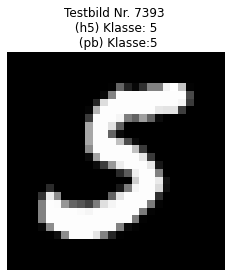

In [57]:
#Vergleich der Ergebnisse und Prüfung des trainierten Netzes
import matplotlib.pyplot as plt
import random
randindex = random.randint(0,10000)
#Die Funktion argmax() liefert uns den index des höchsten Werts des Ergebnisvektors
h5_class = prediction_h5[randindex].argmax()
pb_class = prediction_pb[randindex].argmax()
plttitle = "Testbild Nr. {} \n (h5) Klasse: {} \n (pb) Klasse:{}".format(randindex,h5_class, pb_class)
plt.imshow(test_images[randindex].reshape(28,28), cmap='gray')
plt.title(plttitle)
plt.axis('off')
plt.show()